## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from numpy import cov
import statistics
from scipy.stats.stats import pearsonr
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

In [3]:
#Paths
cadiz_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Barren.xlsx - Cadiz Valley.csv - Sheet1.csv'
auburn_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Evergreen _Forest.xlsx - Auburn_csv.csv'
plymouth_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Grassland.xlsx - Plymouth_csv.csv'
slo_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Grassland.xlsx - San Luis Obispo_csv.csv'
riverside_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Grassland.xlsx - U.C Riverside_csv.csv'
bishop_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Pasture.xlsx - Bishop_csv.csv'
bpoint_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Pasture.xlsx - Black Point_csv.csv'
camarillo_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Pasture.xlsx - Camarillo_csv.csv'
mcarthur_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Pasture.xlsx - McArthur_csv.csv'
santarosa_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Pasture.xlsx - Santa Rosa_csv.csv'
brownsvalley_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Shrub.xlsx - Browns Valley_csv.csv'
oasis_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Shrub.xlsx - Oasis_csv.csv'
temecula_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Shrub.xlsx - Temecula_csv.csv'
victorville_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/Shrub.xlsx - Victorville_csv.csv'
arvin_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/arvin_cultivated.csv'
cadiz_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/cadiz_barren.csv'
fairoaks_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/fairoaks_devopen.csv'
gilroy_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/gilroy_cultivated.csv'
lakearrow_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/lake arrow_devmed.csv'
oakland_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/oakland metro_devmed.csv'
owens_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/owens_barren.csv'
pajaro_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/pajaro_devlow.csv'
sanbenito_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/sanbenito_devlow.csv'
sanjuan_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/sanjuan_devopen.csv'
scott_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/scott_cultivated.csv'
seeley_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/seeley_cultivated.csv'
slowest_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/slo west_cultivated.csv'
woodland_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/Landcover, CIMIS,SMAP Data/CSV/woodland_cultivated.csv'

In [4]:
#cadiz = pd.read_csv(cadiz_path)
#cadiz = cadiz.dropna()
#cadiz = cadiz[cadiz['Net Rad (W/sq.m)'] != 0]
#
auburn = pd.read_csv(auburn_path)
auburn = auburn.dropna()
auburn = auburn[auburn['Net Rad (W/sq.m)'] != 0]
plymouth = pd.read_csv(plymouth_path)
plymouth = plymouth.dropna()
plymouth = plymouth[plymouth['Net Rad (W/sq.m)'] != 0]
slo = pd.read_csv(slo_path)
slo = slo.dropna()
slo = slo[slo['Net Rad (W/sq.m)'] != 0]
riverside = pd.read_csv(riverside_path)
riverside = riverside.dropna()
riverside = riverside[riverside['Net Rad (W/sq.m)'] != 0]
bishop = pd.read_csv(bishop_path)
bishop = bishop.dropna()
bishop = bishop[bishop['Net Rad (W/sq.m)'] != 0]
bpoint = pd.read_csv(bpoint_path)
bpoint = bpoint.dropna()
bpoint = bpoint[bpoint['Net Rad (W/sq.m)'] != 0]
camarillo = pd.read_csv(camarillo_path)
camarillo = camarillo.dropna()
camarillo = camarillo[camarillo['Net Rad (W/sq.m)'] != 0]
mcarthur = pd.read_csv(mcarthur_path)
mcarthur = mcarthur.dropna()
mcarthur = mcarthur[mcarthur['Net Rad (W/sq.m)'] != 0]
santarosa = pd.read_csv(santarosa_path)
santarosa = santarosa.dropna()
santarosa = santarosa[santarosa['Net Rad (W/sq.m)'] != 0]
brownsvalley = pd.read_csv(brownsvalley_path)
brownsvalley = brownsvalley.dropna()
brownsvalley = brownsvalley[brownsvalley['Net Rad (W/sq.m)'] != 0]
oasis = pd.read_csv(oasis_path)
oasis = oasis.dropna()
oasis = oasis[oasis['Net Rad (W/sq.m)'] != 0]
temecula = pd.read_csv(temecula_path)
temecula = temecula.dropna()
temecula = temecula[temecula['Net Rad (W/sq.m)'] != 0]
victorville = pd.read_csv(victorville_path)
victorville = victorville.dropna()
victorville = victorville[victorville['Net Rad (W/sq.m)'] != 0]

#Add other CSV files -- change data
#rename data column
arvin = pd.read_csv(arvin_path)
arvin = arvin.dropna()
arvin = arvin[arvin['Net Rad (W/sq.m)'] != 0]
arvin = arvin.rename(columns={'Unnamed: 0': 'Date'})
cadiz = pd.read_csv(cadiz_path)
cadiz = cadiz.dropna()
cadiz = cadiz[cadiz['Net Rad (W/sq.m)'] != 0]
cadiz = cadiz.rename(columns={'Unnamed: 0': 'Date'})
fairoaks = pd.read_csv(fairoaks_path)
fairoaks = fairoaks.dropna()
fairoaks = fairoaks[fairoaks['Net Rad (W/sq.m)'] != 0]
fairoaks = fairoaks.rename(columns={'Unnamed: 0': 'Date'})
gilroy = pd.read_csv(gilroy_path)
gilroy = gilroy.dropna()
gilroy = gilroy[gilroy['Net Rad (W/sq.m)'] != 0]
gilroy = gilroy.rename(columns={'Unnamed: 0': 'Date'})
gilroy = gilroy.rename(columns={'Unnamed: 1': 'ssm'})
lakearrow = pd.read_csv(lakearrow_path)
lakearrow = lakearrow.dropna()
lakearrow = lakearrow[lakearrow['Net Rad (W/sq.m)'] != 0]
lakearrow = lakearrow.rename(columns={'Unnamed: 0': 'Date'})
lakearrow = lakearrow.rename(columns={'Unnamed: 1': 'ssm'})
oakland =  pd.read_csv(oakland_path)
oakland = oakland.dropna()
oakland = oakland[oakland['Net Rad (W/sq.m)'] != 0]
oakland = oakland.rename(columns={'Unnamed: 0': 'Date'})
oakland = oakland.rename(columns={'Unnamed: 1': 'ssm'})
#owens = pd.read_csv(owens_path)
#owens = owens.dropna()
#owens = owens[owens['Net Rad (W/sq.m)'] != 0]
#owens = owens.rename(columns={'Unnamed: 0': 'Date'})
pajaro = pd.read_csv(pajaro_path)
pajaro = pajaro.dropna()
pajaro = pajaro[pajaro['Net Rad (W/sq.m)'] != 0]
pajaro = pajaro.rename(columns={'Unnamed: 0': 'Date'})
pajaro = pajaro.rename(columns={'Unnamed: 1': 'ssm'})
sanbenito = pd.read_csv(sanbenito_path)
sanbenito = sanbenito.dropna()
sanbenito = sanbenito[sanbenito['Net Rad (W/sq.m)'] != 0]
sanbenito = sanbenito.rename(columns={'Unnamed: 0': 'Date'})
sanbenito = sanbenito.rename(columns={'Unnamed: 1': 'ssm'})
sanjuan = pd.read_csv(sanbenito_path)
sanjuan = sanjuan.dropna()
sanjuan = sanjuan[sanjuan['Net Rad (W/sq.m)'] != 0]
sanjuan = sanjuan.rename(columns={'Unnamed: 0': 'Date'})
sanjuan = sanjuan.rename(columns={'Unnamed: 1': 'ssm'})
scott = pd.read_csv(scott_path)
scott = scott.dropna()
scott = scott[scott['Net Rad (W/sq.m)'] != 0]
scott = scott.rename(columns={'Unnamed: 0': 'Date'})
scott = scott.rename(columns={'Unnamed: 1': 'ssm'})
seeley = pd.read_csv(seeley_path)
seeley = seeley.dropna()
seeley = seeley[seeley['Net Rad (W/sq.m)'] != 0]
seeley = seeley.rename(columns={'Unnamed: 0': 'Date'})
seeley = seeley.rename(columns={'Unnamed: 1': 'ssm'})
slowest = pd.read_csv(slowest_path)
slowest = slowest.dropna()
slowest = slowest[slowest['Net Rad (W/sq.m)'] != 0]
slowest = slowest.rename(columns={'Unnamed: 0': 'Date'})
slowest = slowest.rename(columns={'Unnamed: 1': 'ssm'})
woodland = pd.read_csv(woodland_path)
woodland = woodland.dropna()
woodland = woodland[woodland['Net Rad (W/sq.m)'] != 0]
woodland = woodland.rename(columns={'Unnamed: 0': 'Date'})
woodland = woodland.rename(columns={'Unnamed: 1': 'ssm'})

## New Slope Aspect Ele Data

In [5]:
cal_topography_path = '/content/drive/My Drive/Grad School/Stanford - Q3 2019-2020/CEE 260D/CEE260D Project/Data/California_Slope_Ele_Aspect.csv'

In [6]:
cal_top = pd.read_csv(cal_topography_path)

In [7]:
cal_top

,CIMIS Stat,Lon,Lat,Slope,Ele,Aspect
0,FivePoints,36.336222,-120.112910,0.0,88.0,-1.0
1,Shafter,35.532556,-119.281790,0.0,111.0,-1.0
2,Davis,38.535694,-121.776360,0.0,19.0,-1.0
3,Firebaugh/Telles,36.851222,-120.590920,0.0,57.0,-1.0
4,Durham,39.608639,-121.824430,0.0,40.0,-1.0
...,...,...,...,...,...,...
148,Ridgecrest,35.659128,-117.636925,0.0,680.0,-1.0
149,Lemon Cove,36.376917,-119.037972,0.0,149.0,-1.0
150,Ferndale Plain,40.604467,-124.243186,0.0,7.0,-1.0
151,Montague,41.798331,-122.463425,1.0,813.0,-1.0


## Standard Correlation Analysis

In [8]:
#List of dataframes
dataframes = [auburn, plymouth, slo, riverside, bishop, bpoint, camarillo, \
              mcarthur, santarosa, brownsvalley, oasis, temecula, victorville,\
              arvin, cadiz, fairoaks, gilroy, lakearrow, oakland, pajaro,\
              sanbenito, sanjuan, scott, seeley, slowest, woodland]

types = ['Evergreen Forest', 'Grassland', 'Grassland', 'Grassland', 'Pasture', 'Pasture', \
         'Pasture', 'Pasture', 'Pasture', 'Shrub', 'Shrub', 'Shrub', 'Shrub',\
         'Cultivated', 'Barren', 'Dev Open', 'Cultivated', 'Dev Medium', 'Dev Medium', 'Dev Low',\
         'Dev Low', 'Dev Open', 'Cultivated', 'Cultivated', 'Cultivated', 'Cultivated']

names = ['Auburn', 'Plymouth', 'San Luis Obispo', 'U.C. Riverside', 'Bishop', 'Black Point', 'Camarillo', \
              'McArthur', 'Santa Rosa', 'Browns Valley', 'Oasis', 'Temecula', 'Victorville', \
         'Arvin-Edison', 'Cadiz Valley', 'Fair Oaks', 'Gilroy', 'Lake Arrowhead', 'Oakland Metro', 'Pajaro',\
         'San Benito', 'San Juan Valley', 'Scott Valley', 'Seeley', 'San Luis Obispo West', 'Woodland']

In [9]:
#adding in slope, aspect, and ele for dataframes
dataframes2 = []
for i in range(len(dataframes)):
  x = dataframes[i]
  new_col1 = []
  new_col2 = []
  new_col3 = []
  name = names[i]
  row = cal_top.loc[cal_top['CIMIS Stat'] == name]
  slope = float(row['Slope'])
  ele = float(row['Ele'])
  aspect = float(row['Aspect'])
  for j in range(len(x)):
    new_col1.append(slope)
    new_col2.append(ele)
    new_col3.append(aspect)
  new_col1 = pd.DataFrame(new_col1)
  new_col2 = pd.DataFrame(new_col2)
  new_col3 = pd.DataFrame(new_col3)
  x = x.join(new_col1)
  x = x.rename(columns={0: 'Slope'})
  x = x.join(new_col2)
  x = x.rename(columns={0: 'Ele'})
  x = x.join(new_col3)
  x = x.rename(columns={0: 'Aspect'})
  x = x.dropna()
  dataframes2.append(x)

In [10]:
dataframes2[0].columns

Index(['Date', 'ssm', 'ETo (mm)', 'Net Rad (W/sq.m)', 'Avg Vap Pres (kPa)',
       'Avg Air Temp (C)', 'Avg Rel Hum (%)', 'Dew Point (C)', 'Slope', 'Ele',
       'Aspect'],
      dtype='object')

In [11]:
#Create list of pearson r correlations for each station based on ssm and et
correlations = []

for i in range(len(dataframes2)):
  #r = pearsonr(dataframes[i]['ssm'], dataframes[i]['ETo (mm)'])[0]
  r = pearsonr(dataframes2[i]['ssm'], dataframes2[i]['ETo (mm)'])[0]
  correlations.append(r)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [12]:
#The next few cells are about creating one final dataframe
correlations = pd.DataFrame(correlations, columns=['R'])

In [13]:
correlations = correlations.join(pd.DataFrame(types))

In [14]:
correlations = correlations.rename(columns={0: 'Type'})

In [15]:
correlations = correlations.join(pd.DataFrame(names))

In [16]:
correlations = correlations.rename(columns={0: 'Name'})

In [17]:
correlations

,R,Type,Name
0,-0.824808,Evergreen Forest,Auburn
1,-0.781300,Grassland,Plymouth
2,-0.644985,Grassland,San Luis Obispo
3,-0.383222,Grassland,U.C. Riverside
4,-0.290226,Pasture,Bishop
5,-0.653709,Pasture,Black Point
6,NaN,Pasture,Camarillo
7,-0.622824,Pasture,McArthur
8,-0.661623,Pasture,Santa Rosa
9,-0.772211,Shrub,Browns Valley


In [18]:
correlations = correlations.dropna()
correlations

,R,Type,Name
0,-0.824808,Evergreen Forest,Auburn
1,-0.781300,Grassland,Plymouth
2,-0.644985,Grassland,San Luis Obispo
3,-0.383222,Grassland,U.C. Riverside
4,-0.290226,Pasture,Bishop
5,-0.653709,Pasture,Black Point
7,-0.622824,Pasture,McArthur
8,-0.661623,Pasture,Santa Rosa
9,-0.772211,Shrub,Browns Valley
10,-0.342727,Shrub,Oasis


Text(0.5, 1.0, 'Net Rad (W/sq.m)')

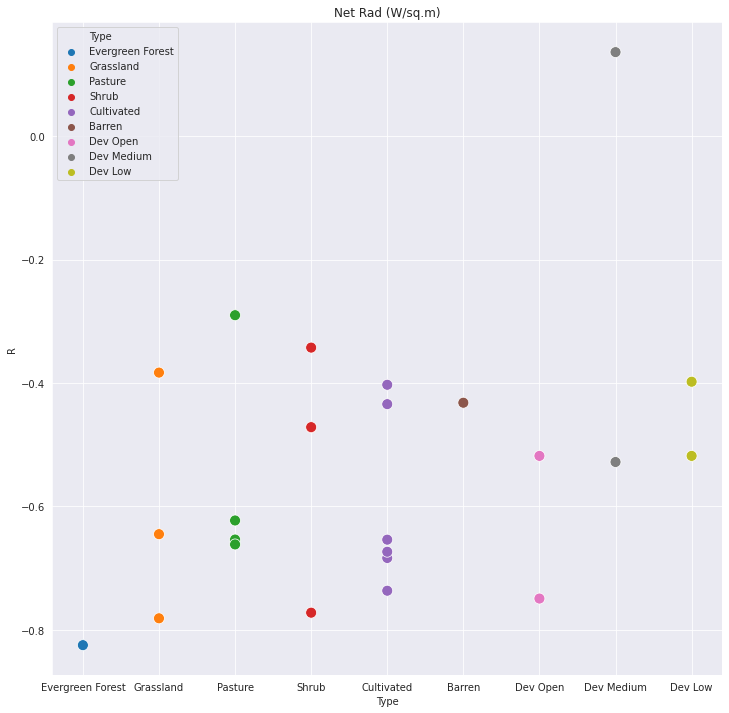

In [19]:
plt.figure(figsize=(12,12))
sns.set_style("darkgrid")
sns.scatterplot(x= 'Type', y='R', hue='Type', data=correlations, legend='full',s=120)
plt.title('Net Rad (W/sq.m)')
#plt.ylim(-1, .2)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

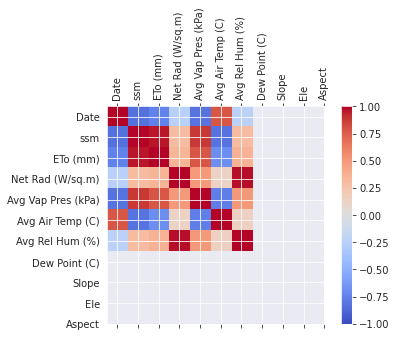

In [21]:
#helpful blog post https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
corr = dataframes2[0].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataframes2[0].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframes2[0].columns)
ax.set_yticklabels(dataframes2[0].columns)
plt.show()

## Concatenate Analysis

In [22]:
dataframes2_concat = pd.concat(dataframes2)

In [23]:
dataframes2_concat

,Date,ssm,ETo (mm),Net Rad (W/sq.m),Avg Vap Pres (kPa),Avg Air Temp (C),Avg Rel Hum (%),Dew Point (C),Slope,Ele,Aspect,qc,qc.1,qc.2,qc.3,qc.4
0,"Oct 2, 2015",7.039896,1.11,25.0,1.6,18.0,79,14.4,5.0,281.0,265.0,NaN,NaN,NaN,NaN,NaN
1,"Oct 5, 2015",3.931013,3.84,98.0,1.1,18.7,50,8.1,5.0,281.0,265.0,NaN,NaN,NaN,NaN,NaN
2,"Oct 8, 2015",3.415827,3.58,86.0,1.4,21.3,54,11.5,5.0,281.0,265.0,NaN,NaN,NaN,NaN,NaN
3,"Oct 11, 2015",2.895270,4.32,91.0,1.2,23.9,39,9.3,5.0,281.0,265.0,NaN,NaN,NaN,NaN,NaN
4,"Oct 14, 2015",2.272609,4.95,83.0,0.9,28.8,23,5.7,5.0,281.0,265.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,"Jul 16, 2019",1.953846,6.77,185.0,1.6,24.0,55,14.3,0.0,25.0,-1.0,H,H,R,S,Q
462,"Jul 19, 2019",1.953846,6.66,188.0,1.6,21.9,60,13.7,0.0,25.0,-1.0,H,H,R,S,Q
463,"Jul 22, 2019",1.953846,7.12,181.0,1.6,26.5,47,14.2,0.0,25.0,-1.0,H,H,R,S,Q
464,"Jul 25, 2019",1.953846,6.94,164.0,1.4,26.5,40,11.8,0.0,25.0,-1.0,R,H,Y,S,Q


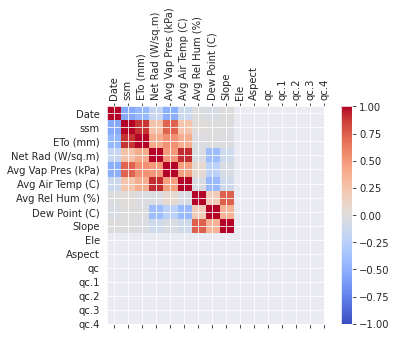

In [24]:
corr = dataframes2_concat.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataframes2_concat.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframes2_concat.columns)
ax.set_yticklabels(dataframes2_concat.columns)
plt.show()

In [25]:
r = pearsonr(dataframes2_concat['Aspect'], dataframes2_concat['ssm'])[0]
r

0.0009492813640125247

## Correlation Analysis Normalized

normalizing ET by net radiation or by sensible+latent heat before taking the correlation with soil moisture, if you have the necessary data already (you would then be looking at evaporative fraction instead of ET)

dataframes = [auburn, plymouth, slo, riverside, bishop, bpoint, camarillo, \
              mcarthur, santarosa, brownsvalley, oasis, temecula, victorville]

In [26]:
bpoint.columns

Index(['Date', 'ssm', 'ETo (mm)', 'Net Rad (W/sq.m)', 'Avg Vap Pres (kPa)',
       'Avg Air Temp (C)', 'Avg Rel Hum (%)', 'Dew Point (C)'],
      dtype='object')

In [27]:
#creating normalized ET columns
correlations_norm = []

for i in range(len(dataframes)):
  et = dataframes[i]['ETo (mm)']
  et = et / 1000
  nr = dataframes[i]['Net Rad (W/sq.m)']
  norm_et = et / nr
  norm_et = pd.DataFrame(norm_et)
  norm_et = norm_et.dropna()

  r = np.corrcoef(dataframes[i]['ssm'], norm_et[0])[0, 1]
  correlations_norm.append(r)

In [28]:
correlations_norm

[-0.17514538290749995,
 -0.031878606573557275,
 0.1508829635062357,
 0.023642164147309144,
 -0.009646187335169027,
 -0.04742768497345396,
 5.285998540971856e-17,
 0.0075215382192396225,
 0.004451372525267517,
 -0.059555456565660934,
 -0.13027900846474455,
 -0.0004195551502128144,
 -0.1855134595719495,
 -0.07862895940796141,
 -0.045737821976086224,
 0.04452275424473778,
 -0.026235287543513244,
 -0.08568840505836384,
 -0.06315965711172189,
 -0.05294654712424647,
 0.02053749889137173,
 0.02053749889137173,
 -0.11982955398593441,
 -0.029570760597487818,
 0.05424657525670353,
 -0.0476105249044366]

In [29]:
#The next few cells are about creating one final dataframe
correlations_norm = pd.DataFrame(correlations_norm, columns=['R'])

In [30]:
correlations_norm = correlations_norm.join(pd.DataFrame(types))

In [31]:
correlations_norm = correlations_norm.rename(columns={0: 'Type'})

In [32]:
correlations_norm = correlations_norm.join(pd.DataFrame(names))

In [33]:
correlations_norm = correlations_norm.rename(columns={0: 'Name'})

In [34]:
correlations_norm

,R,Type,Name
0,-1.751454e-01,Evergreen Forest,Auburn
1,-3.187861e-02,Grassland,Plymouth
2,1.508830e-01,Grassland,San Luis Obispo
3,2.364216e-02,Grassland,U.C. Riverside
4,-9.646187e-03,Pasture,Bishop
5,-4.742768e-02,Pasture,Black Point
6,5.285999e-17,Pasture,Camarillo
7,7.521538e-03,Pasture,McArthur
8,4.451373e-03,Pasture,Santa Rosa
9,-5.955546e-02,Shrub,Browns Valley


In [35]:
correlations_norm = correlations_norm.dropna()
correlations_norm

,R,Type,Name
0,-1.751454e-01,Evergreen Forest,Auburn
1,-3.187861e-02,Grassland,Plymouth
2,1.508830e-01,Grassland,San Luis Obispo
3,2.364216e-02,Grassland,U.C. Riverside
4,-9.646187e-03,Pasture,Bishop
5,-4.742768e-02,Pasture,Black Point
6,5.285999e-17,Pasture,Camarillo
7,7.521538e-03,Pasture,McArthur
8,4.451373e-03,Pasture,Santa Rosa
9,-5.955546e-02,Shrub,Browns Valley


Text(0.5, 1.0, 'Avg Air Temp (C)')

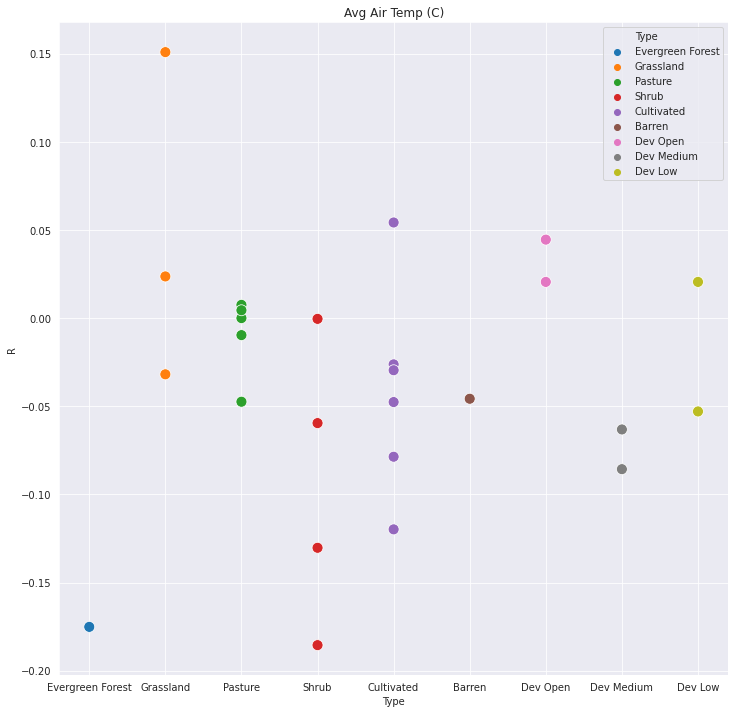

In [36]:
plt.figure(figsize=(12,12))
sns.set_style("darkgrid")
sns.scatterplot(x= 'Type', y='R', hue='Type', data=correlations_norm, legend='full', s=120)
plt.title('Avg Air Temp (C)')
#plt.ylim(-1, .2)

## Lag 9 Day Correlation

In [37]:
#Create lag column and add to dataframes

for i in range(len(dataframes)):
  lag = 1 #correlates to 3 days since each row is three days
  et_lag3 = []
  df = dataframes[i]
  length = df.shape[0]

  for j in range(length):
    if j < lag:
      et = 0
    else:
      et = df['ETo (mm)'].iloc[j-lag]
    et_lag3.append(et)
  
  
  et_lag3 = pd.DataFrame(et_lag3, columns=['ETo (mm) Lag 3 Day'])
  df = df.join(pd.DataFrame(et_lag3))
  df = df.rename(columns={0: 'ETo (mm) Lag 3 Day'})

  df = df.dropna() ## lots of NaN at the end, not sure how to get rid of
  #df = df[df['ETo (mm) Lag 3 Day'] != 0] #getting rid of 0 just to see how that improves correlation

  dataframes[i] = df

  #with dropping zeros and 10 lag aka 30 day correlations increased

In [38]:
dataframes[0]

,Date,ssm,ETo (mm),Net Rad (W/sq.m),Avg Vap Pres (kPa),Avg Air Temp (C),Avg Rel Hum (%),Dew Point (C),ETo (mm) Lag 3 Day
0,"Oct 2, 2015",7.039896,1.11,25,1.6,18.0,79.0,14.4,0.00
1,"Oct 5, 2015",3.931013,3.84,98,1.1,18.7,50.0,8.1,1.11
2,"Oct 8, 2015",3.415827,3.58,86,1.4,21.3,54.0,11.5,3.84
3,"Oct 11, 2015",2.895270,4.32,91,1.2,23.9,39.0,9.3,3.58
4,"Oct 14, 2015",2.272609,4.95,83,0.9,28.8,23.0,5.7,4.32
...,...,...,...,...,...,...,...,...,...
472,"Aug 18, 2019",2.161702,6.50,171,1.3,26.0,40.0,11.4,6.02
473,"Aug 21, 2019",2.161702,5.81,169,1.5,22.9,55.0,13.4,2.22
474,"Aug 24, 2019",2.161702,6.52,160,1.6,28.6,41.0,14.0,4.12
475,"Aug 27, 2019",2.161702,6.82,160,1.5,28.9,37.0,12.8,3.45


In [39]:
#Create list of pearson r correlations for each station based on ssm and et
correlations2 = []

for i in range(len(dataframes)):
  r = pearsonr(dataframes[i]['ssm'], dataframes[i]['ETo (mm) Lag 3 Day'])[0]
  correlations2.append(r)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [40]:
#The next few cells are about creating one final dataframe
correlations2 = pd.DataFrame(correlations2, columns=['R Lag 1'])

In [41]:
correlations2 = correlations2.join(pd.DataFrame(types))

In [42]:
correlations2 = correlations2.rename(columns={0: 'Type'})

In [43]:
correlations2 = correlations2.join(pd.DataFrame(names))

In [44]:
correlations2 = correlations2.rename(columns={0: 'Name'})

In [45]:
correlations2

,R Lag 1,Type,Name
0,-0.594872,Evergreen Forest,Auburn
1,-0.695765,Grassland,Plymouth
2,-0.335789,Grassland,San Luis Obispo
3,-0.072266,Grassland,U.C. Riverside
4,-0.081226,Pasture,Bishop
5,-0.451303,Pasture,Black Point
6,NaN,Pasture,Camarillo
7,-0.601681,Pasture,McArthur
8,0.537013,Pasture,Santa Rosa
9,-0.575953,Shrub,Browns Valley


In [46]:
correlations2 = correlations2.dropna()
correlations2

,R Lag 1,Type,Name
0,-0.594872,Evergreen Forest,Auburn
1,-0.695765,Grassland,Plymouth
2,-0.335789,Grassland,San Luis Obispo
3,-0.072266,Grassland,U.C. Riverside
4,-0.081226,Pasture,Bishop
5,-0.451303,Pasture,Black Point
7,-0.601681,Pasture,McArthur
8,0.537013,Pasture,Santa Rosa
9,-0.575953,Shrub,Browns Valley
10,-0.249043,Shrub,Oasis


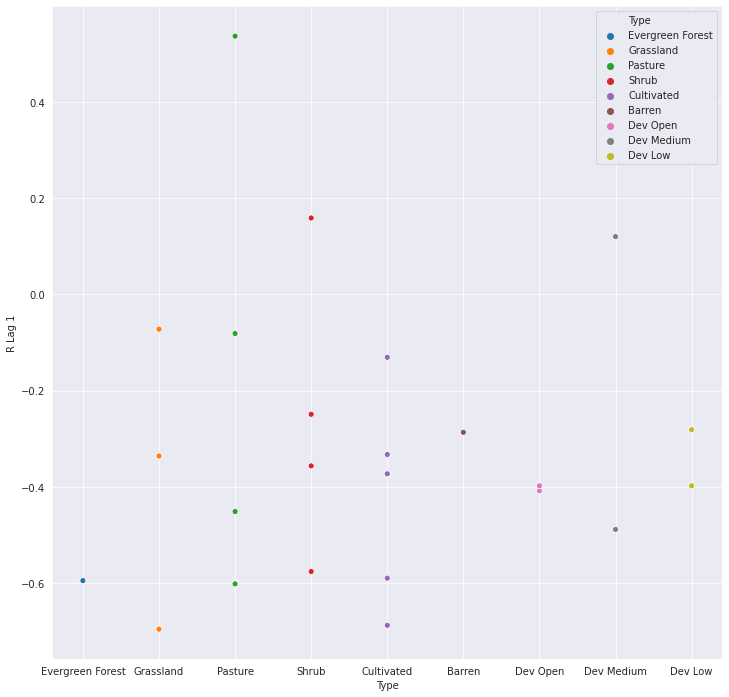

In [47]:
plt.figure(figsize=(12,12))
sns.scatterplot(x= 'Type', y='R Lag 1', hue='Type', data=correlations2, legend='full')

In [48]:
correlations = correlations.join(pd.DataFrame(correlations2['R Lag 1']))

In [49]:
correlations = correlations.rename(columns={0: 'R Lag 1'})

In [50]:
correlations

,R,Type,Name,R Lag 1
0,-0.824808,Evergreen Forest,Auburn,-0.594872
1,-0.781300,Grassland,Plymouth,-0.695765
2,-0.644985,Grassland,San Luis Obispo,-0.335789
3,-0.383222,Grassland,U.C. Riverside,-0.072266
4,-0.290226,Pasture,Bishop,-0.081226
5,-0.653709,Pasture,Black Point,-0.451303
7,-0.622824,Pasture,McArthur,-0.601681
8,-0.661623,Pasture,Santa Rosa,0.537013
9,-0.772211,Shrub,Browns Valley,-0.575953
10,-0.342727,Shrub,Oasis,-0.249043


### Lag 2

In [51]:
#Create et lag 3 column and add to dataframes

for i in range(len(dataframes)):
  lag = 2 #correlates to 3 days since each row is three days
  et_lag3 = []
  df = dataframes[i]
  length = df.shape[0]

  for j in range(length):
    if j < lag:
      et = 0
    else:
      et = df['ETo (mm)'].iloc[j-lag]
    et_lag3.append(et)
  
  
  et_lag3 = pd.DataFrame(et_lag3, columns=['ETo (mm) Lag 6 Day'])
  df = df.join(pd.DataFrame(et_lag3))
  df = df.rename(columns={0: 'ETo (mm) Lag 6 Day'})

  df = df.dropna() ## lots of NaN at the end, not sure how to get rid of
  #df = df[df['ETo (mm) Lag 6 Day'] != 0] #getting rid of 0 just to see how that improves correlation

  dataframes[i] = df

  #with dropping zeros and 10 lag aka 30 day correlations increased

In [52]:
#Create list of pearson r correlations for each station based on ssm and et
correlations2 = []

for i in range(len(dataframes)):
  r = pearsonr(dataframes[i]['ssm'], dataframes[i]['ETo (mm) Lag 6 Day'])[0]
  correlations2.append(r)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [53]:
#The next few cells are about creating one final dataframe
correlations2 = pd.DataFrame(correlations2, columns=['R Lag 2'])

In [54]:
correlations2 = correlations2.join(pd.DataFrame(types))

In [55]:
correlations2 = correlations2.rename(columns={0: 'Type'})

In [56]:
correlations2 = correlations2.join(pd.DataFrame(names))

In [57]:
correlations2 = correlations2.rename(columns={0: 'Name'})

In [58]:
correlations = correlations.join(pd.DataFrame(correlations2['R Lag 2']))

In [59]:
correlations = correlations.rename(columns={0: 'R Lag 2'})

In [60]:
correlations

,R,Type,Name,R Lag 1,R Lag 2
0,-0.824808,Evergreen Forest,Auburn,-0.594872,-0.614983
1,-0.781300,Grassland,Plymouth,-0.695765,-0.715323
2,-0.644985,Grassland,San Luis Obispo,-0.335789,-0.342536
3,-0.383222,Grassland,U.C. Riverside,-0.072266,-0.095651
4,-0.290226,Pasture,Bishop,-0.081226,-0.087978
5,-0.653709,Pasture,Black Point,-0.451303,-0.458857
7,-0.622824,Pasture,McArthur,-0.601681,-0.627930
8,-0.661623,Pasture,Santa Rosa,0.537013,0.462724
9,-0.772211,Shrub,Browns Valley,-0.575953,-0.618133
10,-0.342727,Shrub,Oasis,-0.249043,-0.269535


### Lag 3

In [61]:
#Create et lag 3 column and add to dataframes

for i in range(len(dataframes)):
  lag = 3 #correlates to 3 days since each row is three days
  et_lag3 = []
  df = dataframes[i]
  length = df.shape[0]

  for j in range(length):
    if j < lag:
      et = 0
    else:
      et = df['ETo (mm)'].iloc[j-lag]
    et_lag3.append(et)
  
  
  et_lag3 = pd.DataFrame(et_lag3, columns=['ETo (mm) Lag 9 Day'])
  df = df.join(pd.DataFrame(et_lag3))
  df = df.rename(columns={0: 'ETo (mm) Lag 9 Day'})

  df = df.dropna() ## lots of NaN at the end, not sure how to get rid of
  #df = df[df['ETo (mm) Lag 9 Day'] != 0] #getting rid of 0 just to see how that improves correlation

  dataframes[i] = df

  #with dropping zeros and 10 lag aka 30 day correlations increased

In [62]:
dataframes[0]

,Date,ssm,ETo (mm),Net Rad (W/sq.m),Avg Vap Pres (kPa),Avg Air Temp (C),Avg Rel Hum (%),Dew Point (C),ETo (mm) Lag 3 Day,ETo (mm) Lag 6 Day,ETo (mm) Lag 9 Day
0,"Oct 2, 2015",7.039896,1.11,25,1.6,18.0,79.0,14.4,0.00,0.00,0.00
1,"Oct 5, 2015",3.931013,3.84,98,1.1,18.7,50.0,8.1,1.11,0.00,0.00
2,"Oct 8, 2015",3.415827,3.58,86,1.4,21.3,54.0,11.5,3.84,1.11,0.00
3,"Oct 11, 2015",2.895270,4.32,91,1.2,23.9,39.0,9.3,3.58,3.84,1.11
4,"Oct 14, 2015",2.272609,4.95,83,0.9,28.8,23.0,5.7,4.32,3.58,3.84
...,...,...,...,...,...,...,...,...,...,...,...
452,"Jun 19, 2019",2.161702,7.33,201,1.8,28.3,46.0,15.7,7.44,7.14,6.38
453,"Jun 22, 2019",2.161702,6.92,207,1.2,21.4,49.0,10.1,6.95,7.44,7.14
454,"Jun 25, 2019",2.161702,7.63,205,1.2,26.4,36.0,10.2,6.92,6.95,7.44
455,"Jun 28, 2019",2.161702,5.88,193,1.1,18.3,52.0,8.3,7.42,6.92,6.95


In [63]:
#Create list of pearson r correlations for each station based on ssm and et
correlations2 = []

for i in range(len(dataframes)):
  r = pearsonr(dataframes[i]['ssm'], dataframes[i]['ETo (mm) Lag 9 Day'])[0]
  correlations2.append(r)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [64]:
#The next few cells are about creating one final dataframe
correlations2 = pd.DataFrame(correlations2, columns=['R Lag 3'])

In [65]:
correlations2 = correlations2.join(pd.DataFrame(types))

In [66]:
correlations2 = correlations2.rename(columns={0: 'Type'})

In [67]:
correlations2 = correlations2.join(pd.DataFrame(names))

In [68]:
correlations2 = correlations2.rename(columns={0: 'Name'})

In [69]:
correlations = correlations.join(pd.DataFrame(correlations2['R Lag 3']))

In [70]:
correlations = correlations.rename(columns={0: 'R Lag 3'})

In [71]:
correlations = correlations[['Type', 'Name', 'R', 'R Lag 1', 'R Lag 2', 'R Lag 3']]

In [72]:
correlations

,Type,Name,R,R Lag 1,R Lag 2,R Lag 3
0,Evergreen Forest,Auburn,-0.824808,-0.594872,-0.614983,-0.633860
1,Grassland,Plymouth,-0.781300,-0.695765,-0.715323,-0.721757
2,Grassland,San Luis Obispo,-0.644985,-0.335789,-0.342536,-0.392042
3,Grassland,U.C. Riverside,-0.383222,-0.072266,-0.095651,-0.074628
4,Pasture,Bishop,-0.290226,-0.081226,-0.087978,-0.120967
5,Pasture,Black Point,-0.653709,-0.451303,-0.458857,-0.469765
7,Pasture,McArthur,-0.622824,-0.601681,-0.627930,-0.648181
8,Pasture,Santa Rosa,-0.661623,0.537013,0.462724,0.428879
9,Shrub,Browns Valley,-0.772211,-0.575953,-0.618133,-0.644464
10,Shrub,Oasis,-0.342727,-0.249043,-0.269535,-0.270250


In [73]:
length

424

In [74]:
x = ['R', 'R Lag 1', 'R Lag 2', 'R Lag 3']
y_all = []

for i in range(correlations.shape[0]):
  y = correlations.iloc[i]
  y = y[2:6]
  y_all.append(y)
y_all

[R         -0.824808
 R Lag 1   -0.594872
 R Lag 2   -0.614983
 R Lag 3    -0.63386
 Name: 0, dtype: object, R           -0.7813
 R Lag 1   -0.695765
 R Lag 2   -0.715323
 R Lag 3   -0.721757
 Name: 1, dtype: object, R         -0.644985
 R Lag 1   -0.335789
 R Lag 2   -0.342536
 R Lag 3   -0.392042
 Name: 2, dtype: object, R          -0.383222
 R Lag 1   -0.0722656
 R Lag 2   -0.0956512
 R Lag 3   -0.0746276
 Name: 3, dtype: object, R          -0.290226
 R Lag 1   -0.0812265
 R Lag 2   -0.0879783
 R Lag 3    -0.120967
 Name: 4, dtype: object, R         -0.653709
 R Lag 1   -0.451303
 R Lag 2   -0.458857
 R Lag 3   -0.469765
 Name: 5, dtype: object, R         -0.622824
 R Lag 1   -0.601681
 R Lag 2    -0.62793
 R Lag 3   -0.648181
 Name: 7, dtype: object, R         -0.661623
 R Lag 1    0.537013
 R Lag 2    0.462724
 R Lag 3    0.428879
 Name: 8, dtype: object, R         -0.772211
 R Lag 1   -0.575953
 R Lag 2   -0.618133
 R Lag 3   -0.644464
 Name: 9, dtype: object, R         -0.342727

In [75]:
y_all[0][0:4]

R         -0.824808
R Lag 1   -0.594872
R Lag 2   -0.614983
R Lag 3    -0.63386
Name: 0, dtype: object

(1.0, -1.0)

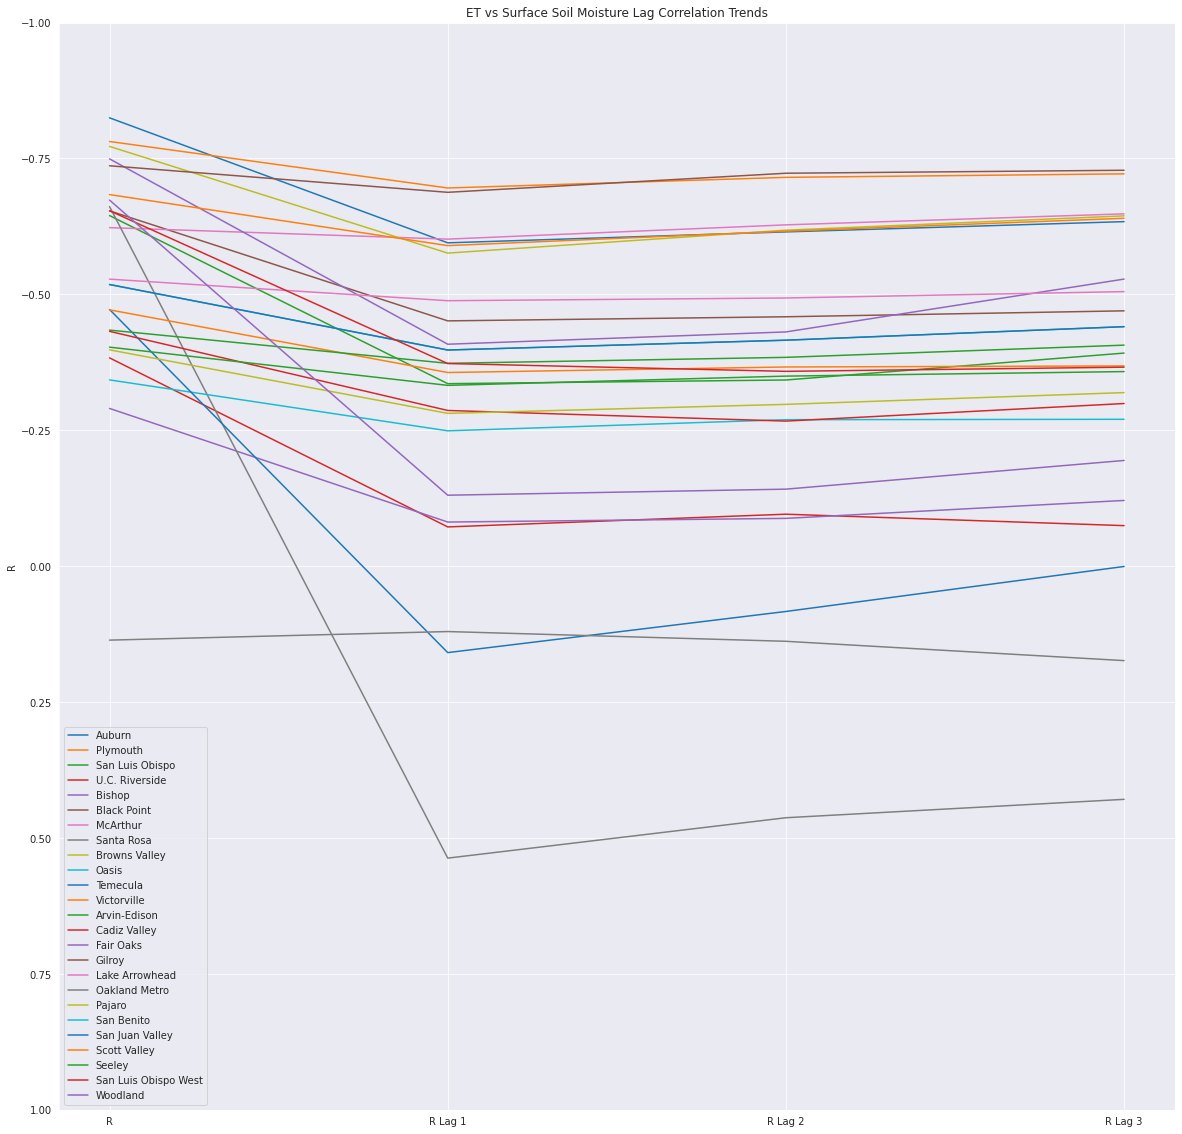

In [76]:
#Plot
sns.set_style("darkgrid")
x = x
y1 = y_all[0][0:4]
y2 = y_all[1][0:4]
y3 = y_all[2][0:4]
y4 = y_all[3][0:4]
y5 = y_all[4][0:4]
y6 = y_all[5][0:4]
y7 = y_all[6][0:4]
y8 = y_all[7][0:4]
y9 = y_all[8][0:4]
y10 = y_all[9][0:4]
y11 = y_all[10][0:4]
y12 = y_all[11][0:4]
y13 = y_all[12][0:4]
y14 = y_all[13][0:4]
y15 = y_all[14][0:4]
y16 = y_all[15][0:4]
y17 = y_all[16][0:4]
y18 = y_all[17][0:4]
y19 = y_all[18][0:4]
y20 = y_all[19][0:4]
y21 = y_all[20][0:4]
y22 = y_all[21][0:4]
y23 = y_all[22][0:4]
y24 = y_all[23][0:4]
y25 = y_all[24][0:4]
plt.figure(figsize=(20,20))
plt.plot(x,y1,x,y2,x,y3,x,y4,x,y5,x,y6,x,y7,x,y8,x,y9,x,y10,x,y11,x,y12,x,y13,x,y14,x,y15,x,y16,x,y17,x,y18,x,y19,x,y20,x,y21,x,y22,x,y23,x,y24,x,y25, label=correlations['Name'])
plt.legend(correlations['Name'])
plt.title('ET vs Surface Soil Moisture Lag Correlation Trends')
plt.ylabel('R')
plt.ylim(1, -1)

In [77]:
correlations_test = correlations.transpose()
correlations_test

,0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Type,Evergreen Forest,Grassland,Grassland,Grassland,Pasture,Pasture,Pasture,Pasture,Shrub,Shrub,Shrub,Shrub,Cultivated,Barren,Dev Open,Cultivated,Dev Medium,Dev Medium,Dev Low,Dev Low,Dev Open,Cultivated,Cultivated,Cultivated,Cultivated
Name,Auburn,Plymouth,San Luis Obispo,U.C. Riverside,Bishop,Black Point,McArthur,Santa Rosa,Browns Valley,Oasis,Temecula,Victorville,Arvin-Edison,Cadiz Valley,Fair Oaks,Gilroy,Lake Arrowhead,Oakland Metro,Pajaro,San Benito,San Juan Valley,Scott Valley,Seeley,San Luis Obispo West,Woodland
R,-0.824808,-0.7813,-0.644985,-0.383222,-0.290226,-0.653709,-0.622824,-0.661623,-0.772211,-0.342727,-0.472257,-0.471608,-0.434329,-0.432039,-0.749314,-0.736628,-0.528074,0.13599,-0.397994,-0.518172,-0.518172,-0.683616,-0.402948,-0.6539,-0.673473
R Lag 1,-0.594872,-0.695765,-0.335789,-0.0722656,-0.0812265,-0.451303,-0.601681,0.537013,-0.575953,-0.249043,0.158948,-0.356315,-0.373229,-0.286508,-0.408333,-0.687792,-0.488392,0.120212,-0.281135,-0.397697,-0.397697,-0.589726,-0.332667,-0.372809,-0.13059
R Lag 2,-0.614983,-0.715323,-0.342536,-0.0956512,-0.0879783,-0.458857,-0.62793,0.462724,-0.618133,-0.269535,0.083278,-0.366477,-0.384201,-0.266907,-0.430966,-0.722891,-0.493395,0.138151,-0.297719,-0.415746,-0.415746,-0.616292,-0.349675,-0.358449,-0.141743
R Lag 3,-0.63386,-0.721757,-0.392042,-0.0746276,-0.120967,-0.469765,-0.648181,0.428879,-0.644464,-0.27025,0.000490161,-0.368414,-0.406651,-0.299261,-0.528167,-0.728379,-0.505139,0.173682,-0.319337,-0.440635,-0.440635,-0.640017,-0.358007,-0.366133,-0.194502


## Plotting

In [78]:
def plotting(name):
  x = name['Date'].iloc[50:76]
  y1 = name['ETo (mm)'].iloc[50:76]
  y2 = name['ssm'].iloc[50:76]
  plt.figure(figsize=(10,10))
  plt.plot(x,y1,x,y2)
  #plt.scatter(x,y1)
  #plt.scatter(x,y2)
  namez =[x for x in globals() if globals()[x] is name][0]
  #print("Dataframe Name is: %s" % namez)
  plt.legend(['ETo', 'ssm'])
  plt.title('ET vs Surface Soil Moisture'+' (Station: '+ namez +')')
  plt.xlabel('Days (3 Day Interval)')
  plt.ylabel('SSM and ET in mm')
  plt.xticks(x, rotation=45)

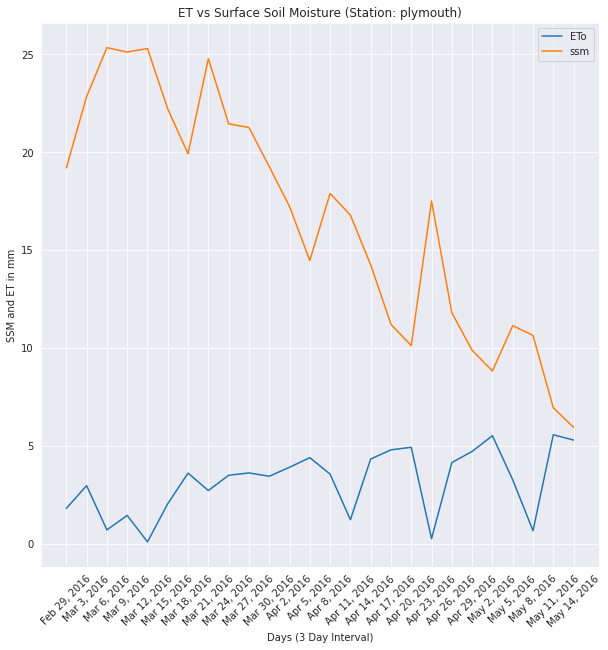

In [79]:
#names = ['auburn', 'plymouth', 'slo', 'riverside', 'bishop', 'bpoint', 'camarillo', \
              #'mcarthur', 'santarosa', 'brownsvalley', 'oasis', 'temecula', 'victorville' \
         #'arvin', 'cadiz', 'fairoaks', 'gilroy', 'lakearrow', 'oakland', 'pajaro'\
         #'sanbenito', 'sanjuan', 'scott', 'seeley', 'slowest', 'woodland']

#try with a scatter plot --> double check if there are NaN values
plotting(plymouth)